In [7]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
%reload_ext autoreload
%autoreload 2

import os, sys
import numpy as np 
import matplotlib.pyplot as plt
import healpy as hp

sys.path.append('../src/')
import needlets

In [8]:
# plot mexican hat wavelet


In [10]:
gauss = needlets.GaussianNeedlet(np.array([600., 300., 120., 60., 30., 15., 10., 7.5, 5.]), 3000)
cos = needlets.CosineNeedlet([0,100,200,350,500],[0,0,100,200,350],[100,200,350,500,500])


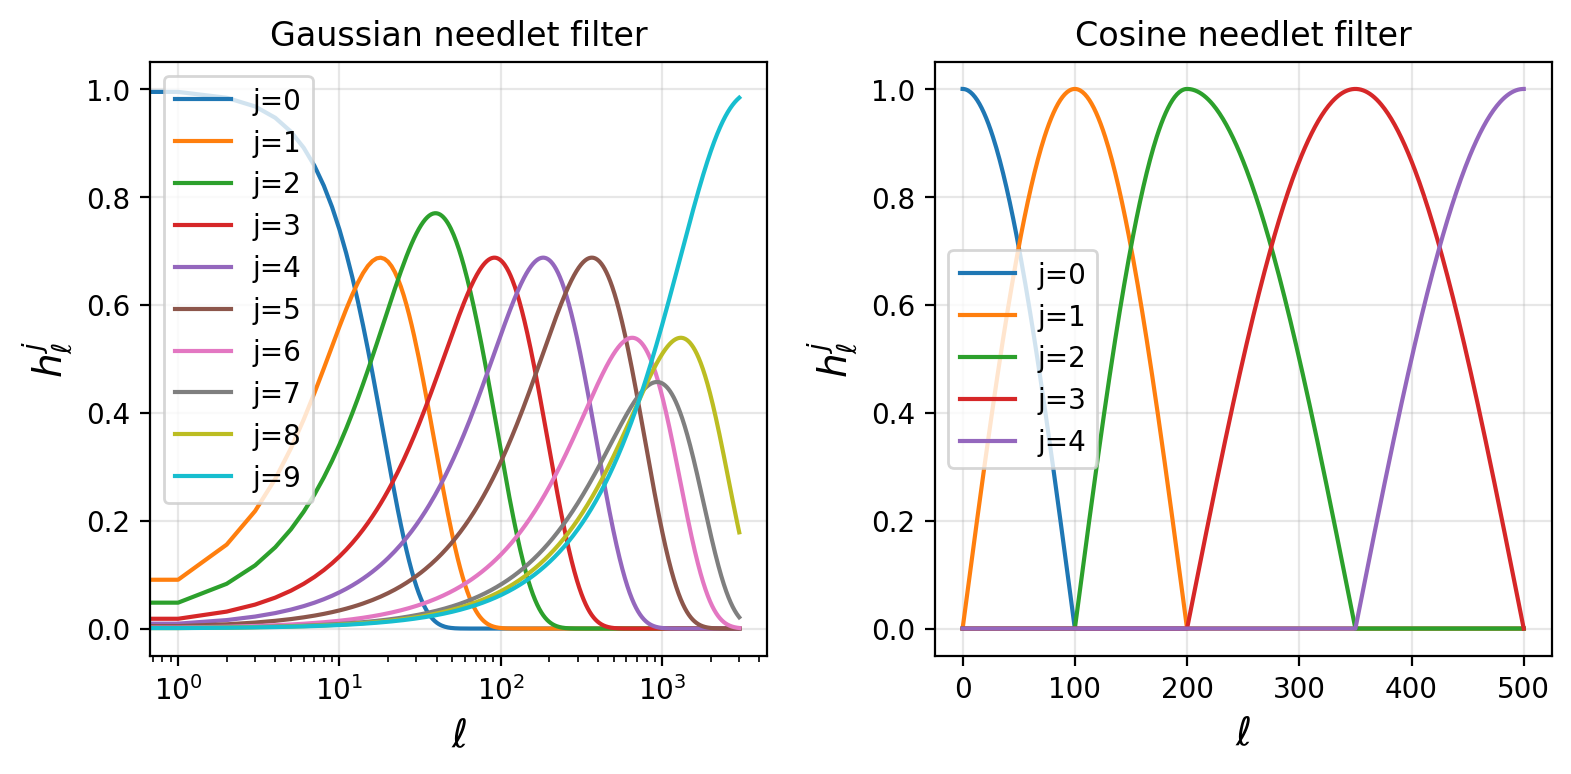

In [11]:
plt.figure(figsize=(8,4))

plt.subplot(121)
gauss.plot_filter()
plt.xscale('log')
plt.title('Gaussian needlet filter')

plt.subplot(122)
cos.plot_filter()
plt.title('Cosine needlet filter')

plt.tight_layout()
plt.show()

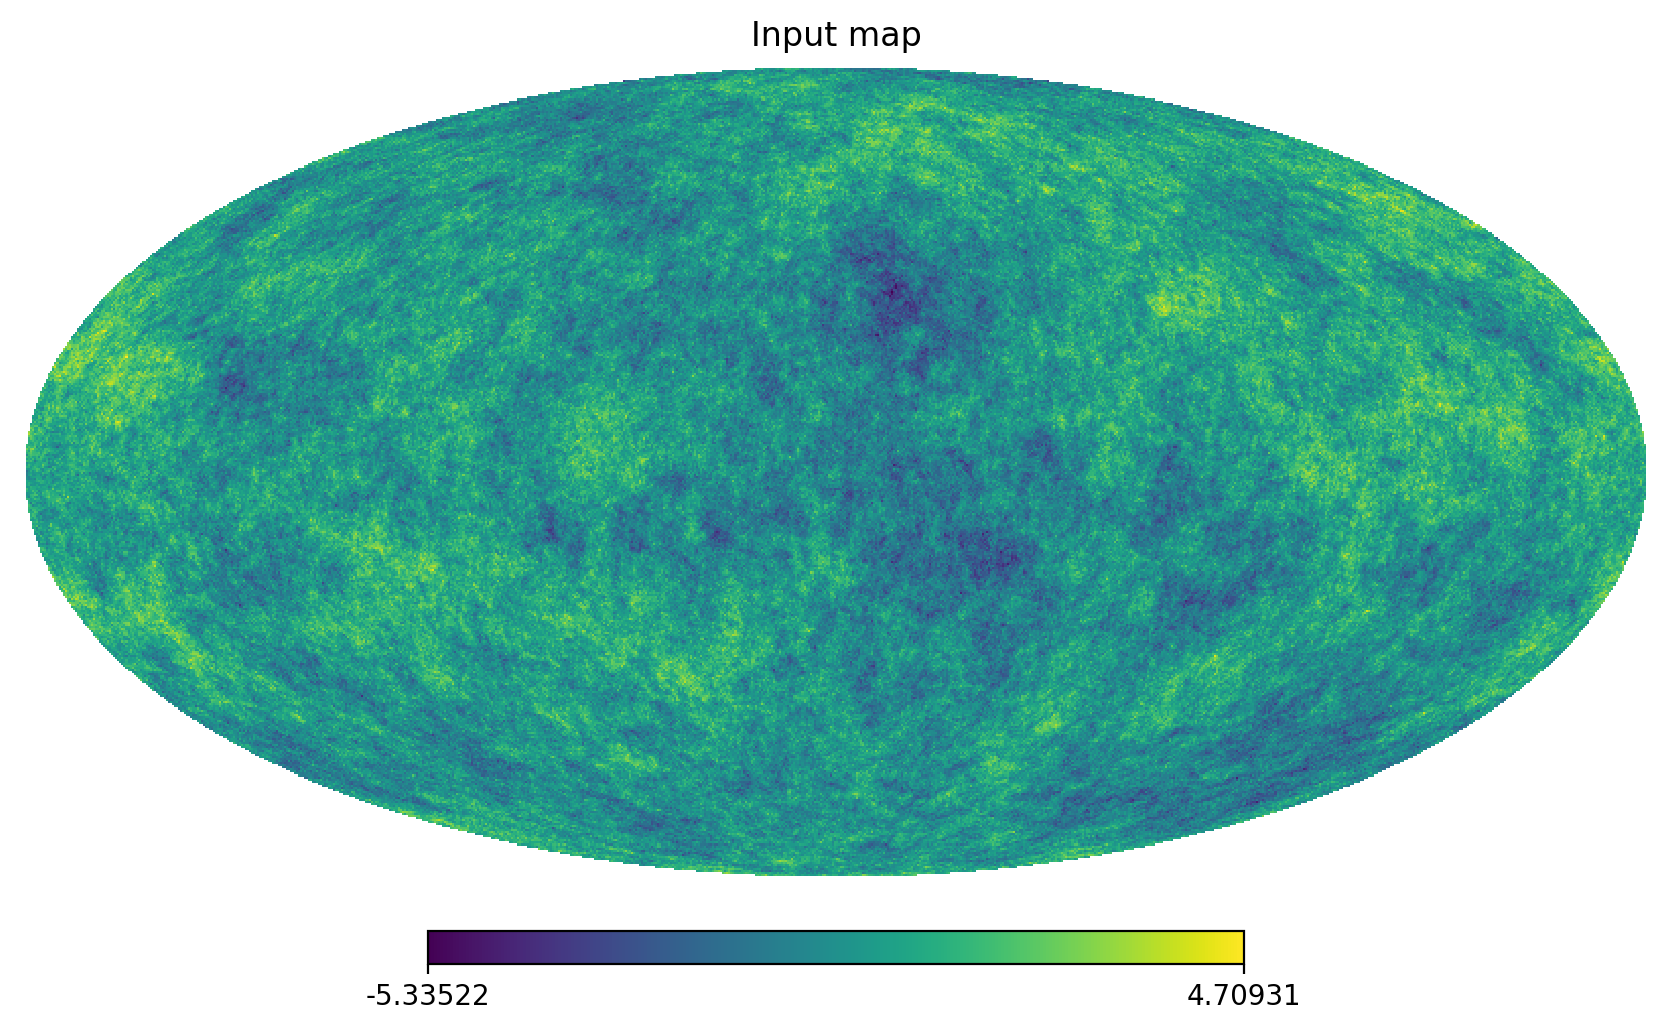

In [12]:
# Generate a map with a power-law power spectrum
cl = np.arange(30000, dtype=np.float64)
cl[2:] = 1./cl[2:]**2
tmap = hp.synfast(cl, 512)

hp.mollview(tmap, title='Input map')

/var/folders/lc/ln8jn7b94k95c7b8pb6f77z0dkfn26/T/ipykernel_20454/2970771481.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  bjk = np.array(bjk)


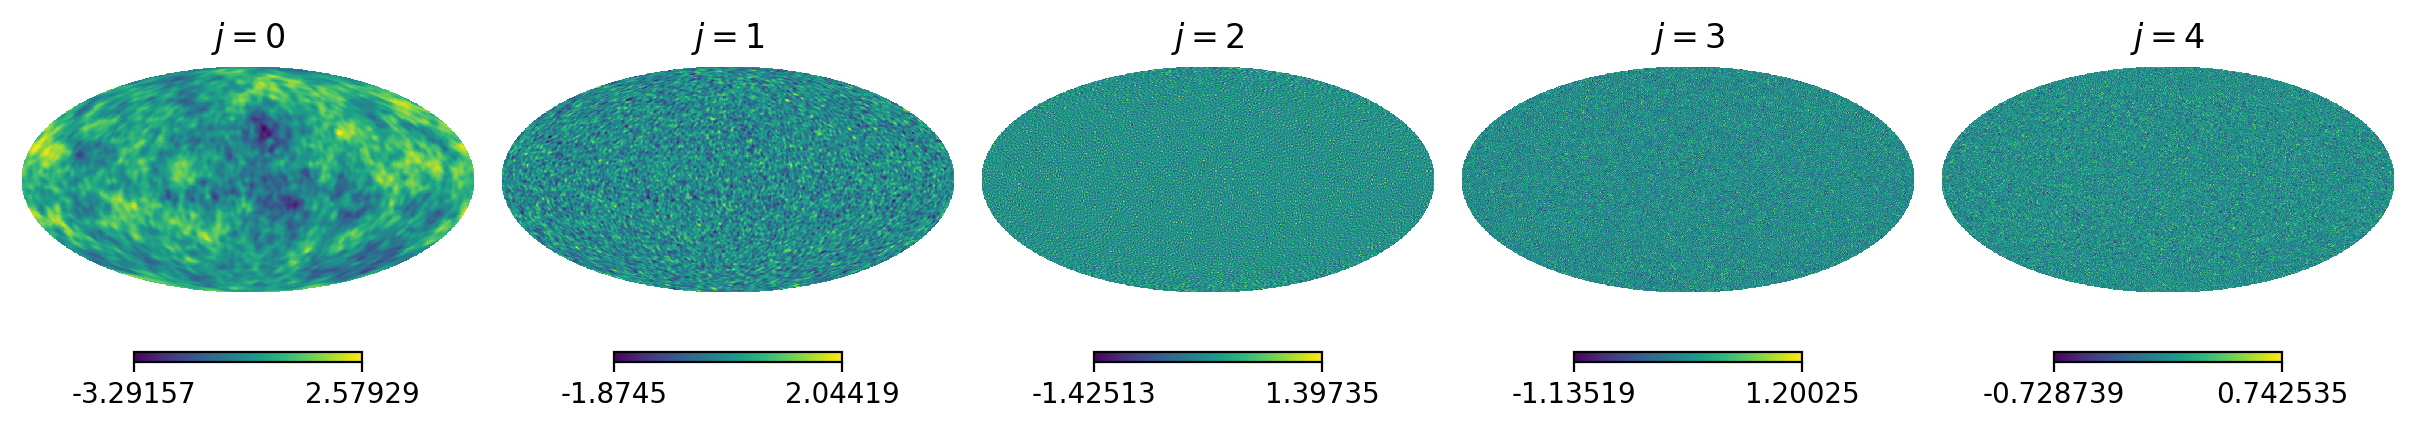

In [13]:
bjk = [cos.map2betajk(tmap, j) for j in range(cos.nbands)]
bjk = np.array(bjk)

plt.figure(figsize=(12,6))
for j in range(cos.nbands):
    hp.mollview(bjk[j], title=r'$j={}$'.format(j), sub=(1,cos.nbands,j+1),)# min=-1, max=1)